# Cars Data Exploration
Review the cars dataset

In [98]:
# import project libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction import FeatureHasher

### Collect data 
Read csv file to collect cars data and filter relevant features

In [78]:
# Read CSV file
cars_df = pd.read_csv(r'C:\Users\cesar_0qb0xal\Documents\GitHub\cars_ml_project\data\data_exploration\input\cars.csv')
cars_df

,Unnamed: 0,msrp,year,canonical_mmty,model,local_zone,interior_color,aff_code,price,price_badge,...,mileage,make,bodystyle,cat,vin,canonical_mmt,fuel_type,stock_type,exterior_color,page_channel
0,0,57215.0,2024,Chevrolet:Blazer EV:RS:2024,Blazer EV,NaN,Black,national,54595.0,NaN,...,0.0,Chevrolet,SUV,ev_crossover_midsize,3GNKDCRJ6RS227894,Chevrolet:Blazer EV:RS,Electric,New,Sterling Gray Metallic,shopping
1,1,58845.0,2024,RAM:ProMaster 2500:High Roof:2024,ProMaster 2500,NaN,Black,national,52446.0,NaN,...,0.0,RAM,Cargo Van,van_fullsize,3C6LRVDG0RE118763,RAM:ProMaster 2500:High Roof,Gasoline,New,Bright White Clearcoat,shopping
2,2,58795.0,2024,Mercedes-Benz:Sprinter 2500:High Roof:2024,Sprinter 2500,NaN,NaN,national,54295.0,NaN,...,8.0,Mercedes-Benz,Cargo Van,van_fullsize,W1Y4KCHY8RT178723,Mercedes-Benz:Sprinter 2500:High Roof,Diesel,New,Blue Grey,shopping
3,3,33815.0,2024,Honda:CR-V:EX:2024,CR-V,NaN,Gray,national,NaN,NaN,...,7.0,Honda,SUV,crossover_compact,5J6RS3H44RL004214,Honda:CR-V:EX,Gasoline,New,Radiant Red Metallic,shopping
4,4,27995.0,2024,Chevrolet:Equinox:LS:2024,Equinox,NaN,Medium Ash Gray,national,24803.0,NaN,...,0.0,Chevrolet,SUV,crossover_midsize,3GNAXHEG1RL299011,Chevrolet:Equinox:LS,Gasoline,New,Summit White,shopping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58344,58344,56115.0,2024,Cadillac:XT5:Premium Luxury:2024,XT5,NaN,Black,national,56115.0,NaN,...,5.0,Cadillac,SUV,luxurysuv_crossover,1GYKNDRS7RZ748902,Cadillac:XT5:Premium Luxury,Gasoline,New,Silver Metallic,shopping
58345,58345,42975.0,2024,Audi:A3:Premium Plus:2024,A3,NaN,Santos Brown,national,42975.0,NaN,...,10.0,Audi,Sedan,luxurypassenger_standard,WAUBUDGY4RA122137,Audi:A3:Premium Plus,Gasoline,New,Ibis White,shopping
58346,58346,27875.0,2024,Mazda:CX-30:Select:2024,CX-30,NaN,Black/Black,national,27875.0,NaN,...,15.0,Mazda,SUV,crossover_compact,3MVDMBBM2RM622786,Mazda:CX-30:Select,Gasoline,New,Deep Crystal Blue Mica,shopping
58347,58347,33389.0,2024,Volkswagen:Taos:1.5T SE:2024,Taos,NaN,Black,national,30618.0,NaN,...,5.0,Volkswagen,SUV,crossover_compact,3VVVX7B29RM064803,Volkswagen:Taos:1.5T SE,Gasoline,New,Cornflower Blue,shopping


In [79]:
# Filter relevant features
columns_to_drop = ['page_channel', 'canonical_mmt', 'vin', 'dealer_zip', 'dealer_name', 'trim', 'aff_code', 'canonical_mmty', 'Unnamed: 0', 'local_zone', 'price_badge']
cars_df.drop(columns=columns_to_drop, inplace=True)
cars_df

,msrp,year,model,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,exterior_color
0,57215.0,2024,Blazer EV,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,Sterling Gray Metallic
1,58845.0,2024,ProMaster 2500,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,Bright White Clearcoat
2,58795.0,2024,Sprinter 2500,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,Blue Grey
3,33815.0,2024,CR-V,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,New,Radiant Red Metallic
4,27995.0,2024,Equinox,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,Summit White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58344,56115.0,2024,XT5,Black,56115.0,AWD,5.0,Cadillac,SUV,luxurysuv_crossover,Gasoline,New,Silver Metallic
58345,42975.0,2024,A3,Santos Brown,42975.0,FWD,10.0,Audi,Sedan,luxurypassenger_standard,Gasoline,New,Ibis White
58346,27875.0,2024,CX-30,Black/Black,27875.0,All-wheel Drive,15.0,Mazda,SUV,crossover_compact,Gasoline,New,Deep Crystal Blue Mica
58347,33389.0,2024,Taos,Black,30618.0,All-wheel Drive,5.0,Volkswagen,SUV,crossover_compact,Gasoline,New,Cornflower Blue


In [80]:
# Print the dataset shape
cars_df.shape

(58349, 13)

### Clean Data
Remove duplicates in dataset

In [81]:
# Remove duplicates
cars_df.drop_duplicates(inplace=True)
cars_df.shape

(26594, 13)

### Apply Features transformation

#### msrp
manufacturer's suggested retail price. Replace 0 values by NaN, 0 is not a valid price.

In [82]:
# Apply msrp value
def map_msrp(msrp):
    """
    Replace 0 values by null

    :param msrp: manufacturer's suggested retail price
    """
    if msrp == 0:
        return np.nan
    return msrp

In [83]:
# Apply msrp transformation
cars_df['msrp'] = cars_df['msrp'].map(map_msrp)

In [88]:
cars_df['msrp'].skew()

2.6388067131303314

In [89]:
# Check min value
cars_df['msrp'].min()

6000.0

In [90]:
# Check max value
cars_df['msrp'].max()

329486.0

<Axes: >

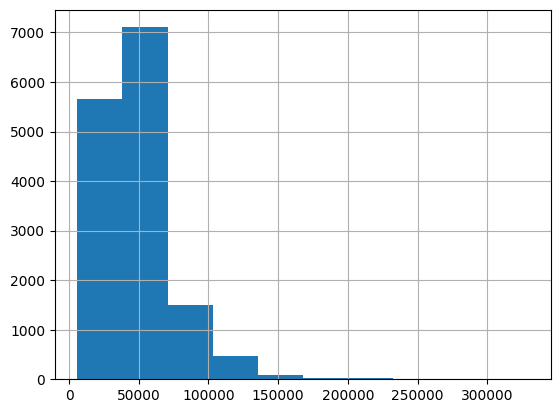

In [91]:
# plot hist
cars_df['msrp'].hist()

#### year
No transformation needed

In [92]:
cars_df['year'].skew()

-3.6162086401904463

In [94]:
cars_df['year'].kurtosis()

23.8067718145981

#### model
Cars model, it's related with the maker

In [95]:
cars_df['model'].value_counts(dropna=False)

model
Outback        588
Escape         515
Tiguan         490
Equinox        447
Rogue          420
              ... 
Yaris Sedan      1
AMG CLS          1
Vue              1
645              1
Mountaineer      1
Name: count, Length: 999, dtype: int64

In [96]:
# Review unique values
len(cars_df['model'].unique())

999

In [103]:
from sklearn.feature_extraction.text import HashingVectorizer
n_hash = len(cars_df['model'].unique())/5
vectorizer = HashingVectorizer(n_features=int(n_hash))
X_model = vectorizer.fit_transform(cars_df['model'].tolist())
list(X_model)

[<1x199 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 <1x199 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 <1x199 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 <1x199 sparse matrix of type '<class 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Row format>,
 <1x199 sparse matrix of type '<class 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Row format>,
 <1x199 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 <1x199 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 <1x199 sparse matrix of type '<class 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Row format>,
 <1x199 sparse matrix of type '<class 'numpy.float64'>'
 	with 1 stored elements

Apply Hash trick is an option. or use a merge with the maker feature

#### interior_color
The feature has not consistensy. Vocabulary is open. Use and embedding method and clustering method to group them. Like TF-IDF or Word2Vec, and KMeans to group them

In [58]:
cars_df['interior_color'].value_counts(dropna=False)

interior_color
Black                                         7033
Jet Black                                     1295
Ebony                                         1262
Gray                                          1251
NaN                                           1027
                                              ... 
Activex Seat Material Light Slate Interior       1
Bh                                               1
Black w/Blue Contrast Stitching                  1
Carbon Black with McLaren Orange                 1
Carmine                                          1
Name: count, Length: 1020, dtype: int64

In [104]:
# Check unique values
len(cars_df['interior_color'].unique())

1179

#### price
Numerical and our target. Use a threshold to revome invalid prices

In [105]:
# Check price values
cars_df['price'].value_counts(dropna=False)

price
NaN        362
17995.0     59
9995.0      57
15995.0     56
14995.0     56
          ... 
46403.0      1
33457.0      1
72470.0      1
39461.0      1
45318.0      1
Name: count, Length: 13934, dtype: int64

In [106]:
# Remove missing values
cars_df = cars_df.loc[~cars_df['price'].isna()]
cars_df.shape

(26232, 13)

In [107]:
# Remove the values below the threshold defined
price_threshold = 1500
cars_df = cars_df.loc[cars_df['price']>=price_threshold]
cars_df.shape

(26217, 13)

In [108]:
# Show min price
cars_df['price'].min()

1500.0

In [109]:
# Show max price
cars_df['price'].max()

1699800.0

<Axes: >

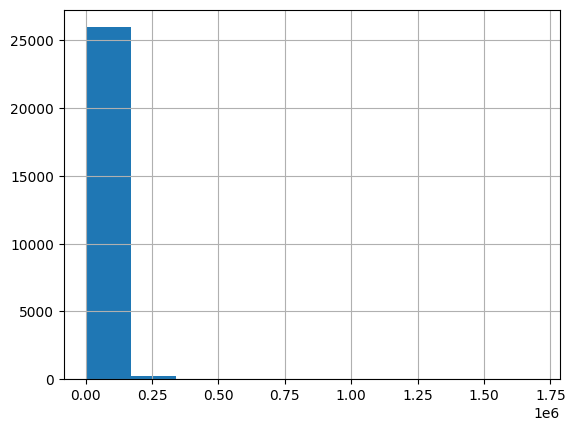

In [110]:
cars_df['price'].hist()

In [111]:
cars_df['price'].skew()

9.120636208066127

#### drivetrain
Close Vocabulary. group them by category

In [112]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive      13059
Front-wheel Drive     5216
Four-wheel Drive      4540
Rear-wheel Drive      2165
AWD                    696
FWD                    208
4WD                    139
NaN                    113
RWD                     55
Unknown                 25
4x2                      1
Name: count, dtype: int64

In [115]:
def map_drivetrain(drivetrain):
    """
    Group the drive trian by categories

    :param drivetrain: Car drive train

    :return: Grouped drive train
    """
    if pd.isna(drivetrain):
        return np.nan

    match drivetrain:
        case 'All-wheel Drive' | 'Four-wheel Drive' | 'AWD' | '4WD' | '4x2':
            return 'All-wheel Drive'
        case 'Rear-wheel Drive' | 'RWD':
            return 'Rear-wheel Drive'
        case 'Front-wheel Drive' | 'FWD':
            return 'Front-wheel Drive'
        case 'Unknown':
            return np.nan
        case _:
            raise Exception(f"No expected drive train: {drivetrain}")
        

In [116]:
# Applt drive train transformation
cars_df['drivetrain'] = cars_df['drivetrain'].map(map_drivetrain)

In [117]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive      18435
Front-wheel Drive     5424
Rear-wheel Drive      2220
NaN                    138
Name: count, dtype: int64

#### mileage
No transformation needed

#### make
Make feature has a semi-close vocabulary. We can use a pretrained model like Word2Vec or One-Hot encoding, this last one can generate the Curse Dimensinality and sparcity.

In [118]:
cars_df['make'].value_counts(dropna=False)

make
Ford             2725
Chevrolet        2060
Nissan           1689
Mercedes-Benz    1653
Hyundai          1595
                 ... 
Triumph             1
Bugatti             1
Datsun              1
Delorean            1
Karma               1
Name: count, Length: 61, dtype: int64

In [120]:
len(cars_df['make'].unique())

61

#### bodystyle
It seems a close vocabulaty (low cardinality). It's possible to apply one-hot encoding.

In [121]:
cars_df['bodystyle'].value_counts(dropna=False)

bodystyle
SUV              15963
Sedan             4505
Pickup Truck      2122
Coupe              964
Hatchback          782
Cargo Van          653
Convertible        622
Passenger Van      221
Wagon              200
NaN                121
Minivan             64
Name: count, dtype: int64

#### cat
We can apply TF-IDF to cluster them in categories after split the text by '_'

In [122]:
cars_df['cat'].value_counts(dropna=False)

cat
crossover_compact               5407
luxurysuv_crossover             3283
crossover_midsize               2324
suv_midsize                     1747
truck_fullsize                  1489
luxurypassenger_standard        1335
sedan_compact                   1237
sedan_midsize                   1066
hybrid_suv                      1042
luxurypassenger_plus             858
van_fullsize                     755
luxurysuv_suv                    624
suv_fullsize                     589
truck_compact                    564
coupeconvertible_coupe           490
ev_suv_midsize                   327
hybrid_passenger                 286
wagonhatchback_hatchback         280
ev_luxurysuv_suv                 265
coupeconvertible_coupesport      244
van_mini                         243
coupeconvertible_convertible     233
NaN                              222
ev_crossover_midsize             212
ev_luxurypassenger_standard      207
sportscar_standard               131
sedan_fullsize                   1

#### fuel_type
It seems like a close category, Nominal. Group them by category

In [123]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline                         22447
Electric                          1437
Hybrid                            1240
Diesel                             515
E85 Flex Fuel                      359
NaN                                185
Flexible Fuel                       11
Plug-In Hybrid                       6
Gasoline Fuel                        6
Bio Diesel                           3
Plug-in Gas/Elec                     2
Electric with Ga                     1
Gas/Electric Hyb                     1
Hybrid Fuel                          1
Premium Unleaded                     1
Regular Unleaded                     1
Gasoline/Mild Electric Hybrid        1
Name: count, dtype: int64

In [130]:
def map_fuel_type(fuel_type):
    """
    Group by fuel types

    :param fuel_type: Car fuel type

    :return Fuel type category
    """
    if pd.isna(fuel_type):
        return np.nan

    match fuel_type:
        case 'Gasoline' | 'Gasoline Fuel' | 'Diesel' | 'Premium Unleaded' | 'Regular Unleaded' | 'Premium Unleaded':
            return 'Gasoline'
        case 'Electric' | 'Electric with Ga':
            return 'Electric'
        case 'Hybrid' | 'Plug-In Hybrid' | 'Plug-in Gas/Elec' | 'Gas/Electric Hyb' | 'Hybrid Fuel' | 'Bio Diesel' | 'Gasoline/Mild Electric Hybrid':
            return 'Hybrid'
        case 'Flexible Fuel' | 'E85 Flex Fuel':
            return 'Flexible'
        case _:
            raise Exception(f"No expected drive train: {fuel_type}")
        

In [131]:
# Apply fuel type transformation
cars_df['fuel_type'] = cars_df['fuel_type'].map(map_fuel_type)

In [132]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline    22970
Electric     1438
Hybrid       1254
Flexible      370
NaN           185
Name: count, dtype: int64

#### stock_type
Not Transformation Needed